<a href="https://colab.research.google.com/github/Chung-collab/GREAT-LAB/blob/main/Omicron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALYSIS OF LIVE COVID-19 DATA – A PYTHON/COLAB APPROACH
sepdek March 29, 2020
http://georgepavlides.info/analysis-of-live-covid-19-data-a-python-colab-approach/

Whole programme of 40 lines in one block for fast running

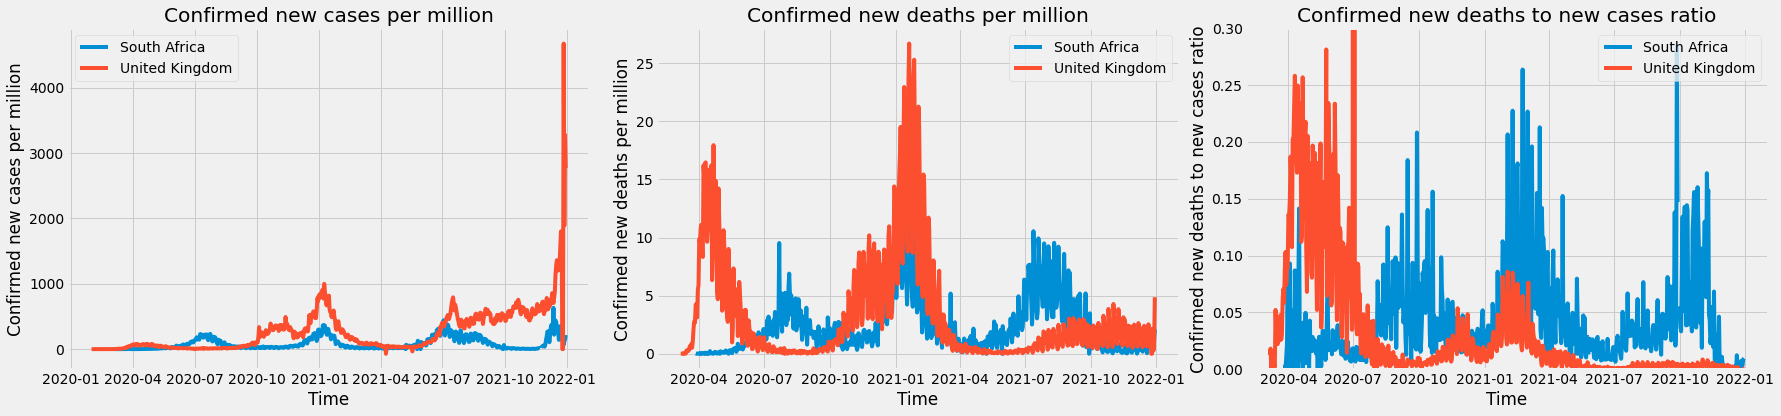

In [ ]:
import pandas as pd
from google.colab import files
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from matplotlib import dates as dts
from matplotlib import pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv' #data source url
data = pd.read_csv(url,parse_dates=['date'],index_col=['date']) #read the csv file
fig = plt.figure(figsize=(25,6)) # define the figure and initialise it to a size
ax1 = fig.add_subplot( 1, 3, 1) # define left subplot ax1
ax1.set_title( 'Confirmed new cases per million')
ax1.set_xlabel( 'Time')
ax1.set_ylabel( 'Confirmed new cases per million')
ax2 = fig.add_subplot( 1, 3, 2) # define middle subplot ax2
ax2.set_title( 'Confirmed new deaths per million')
ax2.set_xlabel( 'Time')
ax2.set_ylabel( 'Confirmed new deaths per million')
ax3 = fig.add_subplot( 1, 3, 3) # define right subplot ax3
ax3.set_title( 'Confirmed new deaths to new cases ratio')
ax3.set_xlabel( 'Time')
ax3.set_ylabel( 'Confirmed new deaths to new cases ratio')
locations = ['South Africa', 'United Kingdom'] # run the loop for the countries chosen by specifying locations = ['xxx', 'yyy']
for loc in locations:
  df = data.query( "location=='"+loc+"'") # filter the data for a particular country
  x = df.index # get the date field (now the 'index')
  ax1.plot( x, df.new_cases_per_million, label=loc)  # create scatter plots 
  ax2.plot( x, df.new_deaths_per_million, label=loc)
  ax3.plot( x, df.new_deaths/df.new_cases, label=loc)
ax1.legend(loc='best') # display a legend for both subplots
ax2.legend(loc='best')
ax3.legend(loc='best')
plt.tight_layout() # maximise the space the graphs will take inside the browser window
days = dts.DayLocator() # activate the minor X axis ticks to represent days
ax1.xaxis.set_minor_locator(days)
ax2.xaxis.set_minor_locator(days)
ax3.xaxis.set_minor_locator(days)
ax3.yaxis.set_view_interval(0, 0.3, True) # set the yaxis min max to exclude outliners
plt.show() # display the figure

Repeat the above in blocks with comments in #

In [ ]:
import pandas as pd
from google.colab import files
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from matplotlib import dates as dts
from matplotlib import pyplot as plt
from matplotlib import style
# select the default graph style
style.use('fivethirtyeight') # or 'ggplot' #see https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html

In [ ]:
#README https://github.com/owid/covid-19-data/blob/master/public/data/README.md
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url,parse_dates=['date'],index_col=['date'])
data.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-11,ZWE,Africa,Zimbabwe,165002.0,9185.0,3782.714,4735.0,12.0,3.714,10932.953,608.594,250.641,313.739,0.795,0.246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8576.0,1558435.0,103.261,0.568,10419.0,0.690,0.3631,2.8,tests performed,6911698.0,3944813.0,2966885.0,NaN,12631.0,24215.0,45.80,26.14,19.66,NaN,1604.0,11239.0,0.074,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-12-12,ZWE,Africa,Zimbabwe,167140.0,2138.0,4013.429,4738.0,3.0,4.000,11074.616,141.663,265.928,313.938,0.199,0.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8682.0,1567117.0,103.836,0.575,11303.0,0.749,0.3551,2.8,tests performed,6933837.0,3956872.0,2976965.0,NaN,22139.0,24893.0,45.94,26.22,19.73,NaN,1649.0,11618.0,0.077,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-12-13,ZWE,Africa,Zimbabwe,167140.0,0.0,4013.429,4738.0,0.0,4.000,11074.616,0.000,265.928,313.938,0.000,0.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6956144.0,3967781.0,2988363.0,NaN,22307.0,25810.0,46.09,26.29,19.80,NaN,1710.0,12096.0,0.080,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-12-14,ZWE,Africa,Zimbabwe,172012.0,4872.0,4344.429,4740.0,2.0,3.857,11397.432,322.816,287.860,314.070,0.133,0.256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6980400.0,3981769.0,2998631.0,NaN,24256.0,24573.0,46.25,26.38,19.87,NaN,1628.0,12047.0,0.080,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-12-15,ZWE,Africa,Zimbabwe,177690.0,5678.0,3866.000,4745.0,5.0,3.571,11773.654,376.222,256.159,314.401,0.331,0.237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.head()

AttributeError: ignored

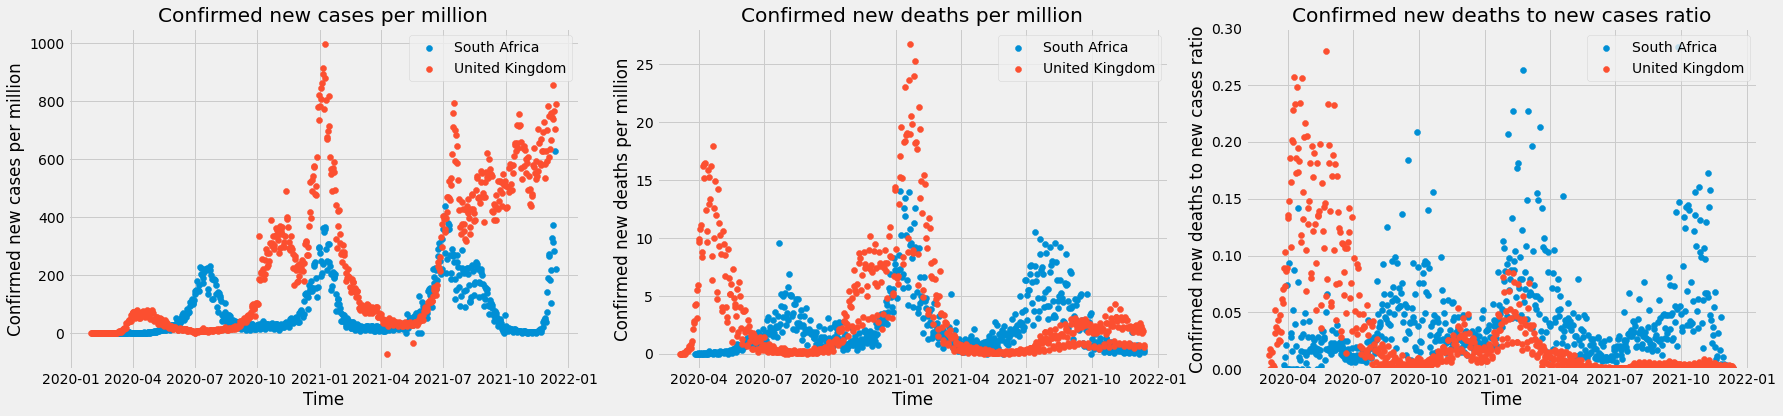

In [ ]:
# define the figure and initialise it to a size
fig = plt.figure(figsize=(25,6))
# define left subplot ax1
ax1 = fig.add_subplot( 1, 3, 1)
ax1.set_title( 'Confirmed new cases per million')
ax1.set_xlabel( 'Time')
ax1.set_ylabel( 'Confirmed new cases per million')
# define middle subplot ax2
ax2 = fig.add_subplot( 1, 3, 2)
ax2.set_title( 'Confirmed new deaths per million')
ax2.set_xlabel( 'Time')
ax2.set_ylabel( 'Confirmed new deaths per million')
# define right subplot ax3
ax3 = fig.add_subplot( 1, 3, 3)
ax3.set_title( 'Confirmed new deaths to new cases ratio')
ax3.set_xlabel( 'Time')
ax3.set_ylabel( 'Confirmed new deaths to new cases ratio')

# run the loop for the countries chosen by specifying locations = ['xxx', 'yyy']
locations = ['South Africa', 'United Kingdom']
for loc in locations:
  # filter the data for a particular country
  df = data.query( "location=='"+loc+"'")
  # get the date field (now the 'index')
  x = df.index
  # create scatter plots 
  ax1.scatter( x, df.new_cases_per_million, label=loc)
  ax2.scatter( x, df.new_deaths_per_million, label=loc)
  ax3.scatter( x, df.new_deaths/df.new_cases, label=loc)

# display a legend for both subplots
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
# maximise the space the graphs will take inside the browser window
plt.tight_layout()
# activate the minor X axis ticks to represent days
days = dts.DayLocator()
ax1.xaxis.set_minor_locator(days)
ax2.xaxis.set_minor_locator(days)
ax3.xaxis.set_minor_locator(days)
# set the yaxis min max to exclude outliners
ax3.yaxis.set_view_interval(0, 0.3, True)
# and finally display the figure
plt.show()

In [ ]:
# create a timestamp for the file
datetimeSignature = datetime.now()
# create the figure filename
graphFileName = 'confirmed_data_' + datetimeSignature.strftime('%Y_%m_%d_%H_%M_%S') + '.png'
# save the figure
fig.savefig(graphFileName,dpi=300)
# download the figure
files.download(graphFileName)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Get population data from the datahub.io (pd.read_csv does not work in this case without the "requests" and "io" operations!)
url = 'https://datahub.io/JohnSnowLabs/population-figures-by-country/r/population-figures-by-country-csv.csv'
# use the requests and io libraries to download the data
response = requests.get(url)
fileObject = io.StringIO(response.content.decode('utf-8'))
# now read and parse the CSV data as usual
worldBankData = pd.read_csv(fileObject)

ParserError: ignored

In [ ]:
# initialise the populations array
populations = [0]*len(locations)
# run a loop for all countries
for idx,loc in enumerate(locations):
  # read the country population from the last column
  dp = worldBankData.query("Country=='"+loc+"'")
  populations[idx] = int( dp.iloc[:,-1] )
  #print("Country=='"+loc+"'", idx, populations[idx])

NameError: ignored

In [ ]:
for idx,loc in enumerate(locations):
  df = data.query( "location=='"+loc+"'")
  x = df.index
  ax1.scatter( x, 100*df["total_cases"]/populations[idx], label=loc)
  ax2.scatter( x, 100*df.total_deaths/populations[idx], label=loc)